# **생능 출판사 "으뜸 데이터 분석과 머신러닝"(개정판) 교재의 소스 코드**
## *11장 하이퍼파라미터 튜닝과 성능평가*
---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 저자 : 박동규, 강영민, 김병욱
* 책의 소스코드 저장소 : https://github.com/dongupak/DataML
* 안내 : 이 노트북은 책의 코드를 담고 있습니다.
* 저작권 : 본 주피터 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.


### 11.1 좋은 모델 선택을 위한 노력 : K-겹 교차검증

### 11.2 교차검증의 구현

In [ ]:
# 사이킷런 모듈을 사용하여 교차 검증을 수행
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()  # 사용할 데이터
logreg = LogisticRegression(max_iter=1000)  # 사용할 모델

# 모델과 데이터, 목표값이 인자로 전달되며, 5-겹 교차검증을 실시함
scores = cross_val_score(logreg, iris.data, iris.target)
print(f"교차 검증 점수: {scores}")
print(f"교차 검증 평균 점수: {scores.mean():.2f}")

# 모델과 데이터, 목표값이 인자로 전달되며, 3-겹 교차검증을 실시함
scores = cross_val_score(logreg, iris.data, iris.target, cv=3)
print(f"교차 검증 점수: {scores}")
print(f"교차 검증 평균 점수: {scores.mean():.2f}")

교차 검증 점수: [0.96666667 1.         0.93333333 0.96666667 1.        ]
교차 검증 평균 점수: 0.97
교차 검증 점수: [0.98 0.96 0.98]
교차 검증 평균 점수: 0.97


In [ ]:
from sklearn.model_selection import cross_validate
import pandas as pd

res = cross_validate(logreg, iris.data, iris.target, cv=5,\
                     return_train_score=True)
res_df = pd.DataFrame(res)   #데이터프레임 형태 변환
print(res_df)
print("평균 시간과 점수:\n", res_df.mean())

   fit_time  score_time  test_score  train_score
0  0.011109    0.000478    0.966667     0.966667
1  0.018204    0.000455    1.000000     0.966667
2  0.010456    0.000409    0.933333     0.983333
3  0.014584    0.000414    0.966667     0.983333
4  0.010748    0.000392    1.000000     0.975000
평균 시간과 점수:
 fit_time       0.013020
score_time     0.000429
test_score     0.973333
train_score    0.975000
dtype: float64


### 11.3 교차검증의 결과를 살펴보자

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV,KFold

iris = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris.data,\
                           iris.target, random_state=0, test_size=0.3)
kfold = KFold(n_splits=5, shuffle=True, random_state=0) # 5-겹 교차검증
values = [0.001, 0.01, 0.1, 1, 10, 100]
param_grid = {'gamma':values, 'C':values}  # GridSearchCV의 딕셔너리 생성

svc = SVC() # SVC모델 생성
grid_search = GridSearchCV(svc, param_grid, cv=kfold)
grid_search.fit(x_train, y_train)

print(f'GridSearchCV를 이용한 최적 매개변수 점수 ==> {grid_search.best_score_:.3f}')
print(f'GridSearchCV를 이용한 최적 매개변수 ==> {grid_search.best_params_}')
print(f'GridSearchCV를 이용한 최고 성능 모델 ==> {grid_search.best_estimator_}')

score = grid_search.score(x_test, y_test)
print(f'GridSearchCV를 이용한 test점수 ==> {score:.3f}')

GridSearchCV를 이용한 최적 매개변수 점수 ==> 0.981
GridSearchCV를 이용한 최적 매개변수 ==> {'C': 10, 'gamma': 0.1}
GridSearchCV를 이용한 최고 성능 모델 ==> SVC(C=10, gamma=0.1)
GridSearchCV를 이용한 test점수 ==> 0.978


Text(0.5, 1.0, 'CV accuracy')

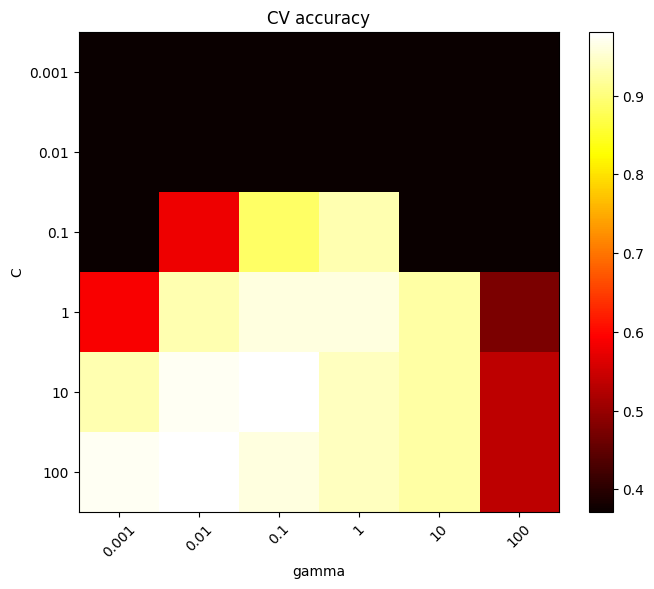

In [ ]:
import matplotlib.pyplot as plt

gs_scores = \
grid_search.cv_results_['mean_test_score'].reshape(len(values),\
                                                   len(values))
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(gs_scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(values)), values, rotation=45)
plt.yticks(np.arange(len(values)), values)
plt.title('CV accuracy')

### 11.4 모델의 성능 평가 방법과 데이터 편향의 문제

In [ ]:
# 입력값 x에 관계없이 0을 반환하는 대충 만든 분류기
def classifier_A(x):
    return 0  # setosa 레이블 0만을 반환함

In [ ]:
import numpy as np
from sklearn.datasets import load_iris

iris_ds = load_iris()  # 붓꽃 데이터셋 가져오기
# 49개의 0(setosa), 1개의 1(versicolor)을 가지는 데이터
biased_iris_ds = iris_ds['data'][1:51]
biased_iris_target = iris_ds['target'][1:51]

print(biased_iris_ds[:5])

[[4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]]


In [ ]:
# 49개의 0(setosa), 1개의 1(versicolor)을 가지는 데이터
print(biased_iris_target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1]


### 11.5 데이터 편향 문제를 극복하자 : 데이터 증강

In [ ]:
result = []
for x in biased_iris_ds:
   result.append(classifier_A(x))

print('분류 결과:')
print(np.array(result))

분류 결과:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
from sklearn.metrics import accuracy_score

score = accuracy_score(biased_iris_target, result)
print('classifier_A(x)의 분류 성능 :', score)

classifier_A(x)의 분류 성능 : 0.98


In [ ]:
import numpy as np
from sklearn.datasets import load_iris

iris_ds = load_iris()  # 붓꽃 데이터셋 가져오기
# 50개의 0(setosa), 50개의 1(versicolor)을 가지는 데이터
balanced_iris_ds = iris_ds['data'][:100]
balanced_iris_target = iris_ds['target'][:100]

result = []
for x in balanced_iris_ds:
   result.append(classifier_A(x))

print('엉터리 분리기의 분류 결과:')
print(np.array(result))

엉터리 분리기의 분류 결과:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
from sklearn.metrics import accuracy_score

print('엉터리 분류기 classifier_A(x)의 분류 성능 :')
accuracy_score(balanced_iris_target, result)

엉터리 분류기 classifier_A(x)의 분류 성능 :


0.5

### 11.6 모델의 성능 평가 지표들

### 11.7 모델의 성능 평가 방법에 대한 직관적 이해

In [ ]:
target = np.array([0] * 10 + [1] * 10)
target  # 10개의 0(Negative), 10개의 1(Positive)를 가짐

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
pred = np.array([0,0,0,0,0,1,1,1,0,0,1,1,1,1,1,1,0,0,1,1])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, pred)   # 혼동행렬 만들기

array([[7, 3],
       [2, 8]])

In [ ]:
from sklearn.metrics import precision_score, recall_score

print('정밀도 :', precision_score(target, pred))
print('재현율 :', recall_score(target, pred))

from sklearn.metrics import accuracy_score, f1_score

print('정확도 :', accuracy_score(target, pred))
print('F1점수 :', f1_score(target, pred))

정밀도 : 0.7272727272727273
재현율 : 0.8
정확도 : 0.75
F1점수 : 0.761904761904762


### 11.8 모델의 성능 평가 방법들

### 11.9 군집 데이터 셋을 만들자 : make_blob() 함수

### 11.10 군집 데이터 셋 시각화

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples= 200, n_features=2, centers=3,\
                 cluster_std= 0.8, random_state= 42)
print(X.shape, y.shape)

(200, 2) (200,)


In [ ]:
X[:5]

array([[ 6.13249845,  2.35223602],
       [-4.60499371,  9.67180813],
       [-6.88942461, -7.59791309],
       [-8.03809466, -8.00608061],
       [-7.351119  , -6.20042792]])

In [ ]:
y[:5]

array([1, 0, 2, 2, 2])

In [ ]:
cluster_df = pd.DataFrame(data = X, columns=['feature1', 'feature2'])
cluster_df['target'] = y
cluster_df.head()

,feature1,feature2,target
0,6.132498,2.352236,1
1,-4.604994,9.671808,0
2,-6.889425,-7.597913,2
3,-8.038095,-8.006081,2
4,-7.351119,-6.200428,2


<Axes: xlabel='feature1', ylabel='feature2'>

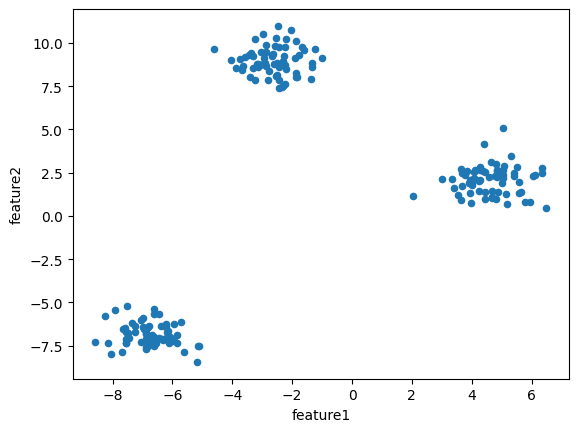

In [ ]:
cluster_df.plot.scatter(x='feature1', y='feature2')

### 11.11 고급 군집화 기능

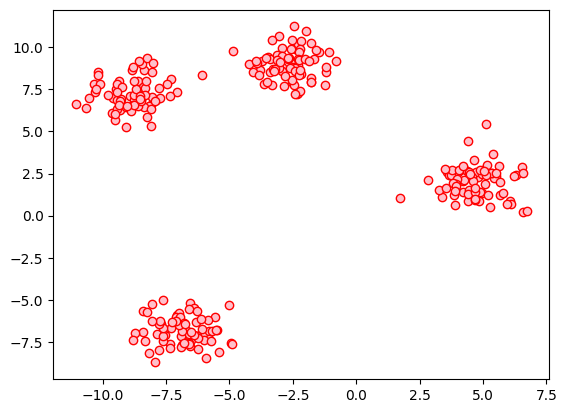

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, n_features=2, centers=4,\
   cluster_std=0.9, random_state=42)

plt.scatter(X[:, 0],X[:, 1],c='pink',marker='o', edgecolors='red')

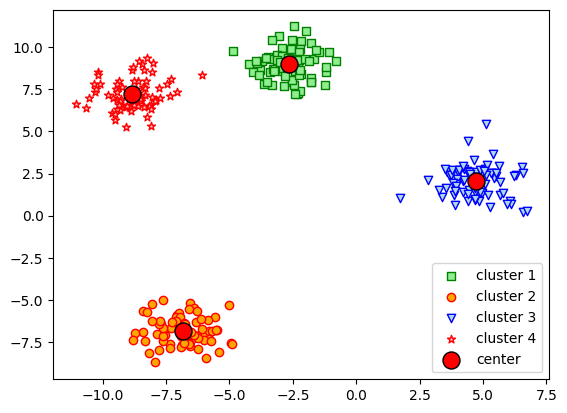

In [ ]:
from sklearn.cluster import KMeans

km_model = KMeans(n_clusters=4, n_init=10, random_state=42)
pred = km_model.fit_predict(X)

plt.scatter(X[pred==0,0], X[pred==0,1], c='lightgreen',\
           marker='s', edgecolors='green', label='cluster 1')
plt.scatter(X[pred==1,0], X[pred==1,1], c='orange',\
           marker='o', edgecolors='red', label='cluster 2')
plt.scatter(X[pred==2,0], X[pred==2,1], c='lightblue',\
           marker='v', edgecolors='blue', label='cluster 3')
plt.scatter(X[pred==3,0], X[pred==3,1], c='pink',\
           marker='*', edgecolors='red', label='cluster 4')
plt.scatter(km_model.cluster_centers_[:,0], \
            km_model.cluster_centers_[:,1],\
            s=150, marker='o', c='red', edgecolors='black', label='center')
plt.legend()

### 11.12 가장 좋은 군집의 수는 어떻게 찾을 수 있을까

In [ ]:
# 이너셔를 출력하자
for i in range(1, 10):
   km_model = KMeans(n_clusters=i,n_init=10, random_state=42)
   km_model.fit(X)
   print(f'KMeans 기법의 이너셔(k={i}) : {km_model.inertia_}')

KMeans 기법의 이너셔(k=1) : 19861.301898628353
KMeans 기법의 이너셔(k=2) : 9308.011149550071
KMeans 기법의 이너셔(k=3) : 2009.2112111594504
KMeans 기법의 이너셔(k=4) : 458.7541803913123
KMeans 기법의 이너셔(k=5) : 415.17652973250404
KMeans 기법의 이너셔(k=6) : 372.8602758952303
KMeans 기법의 이너셔(k=7) : 331.24737882396755
KMeans 기법의 이너셔(k=8) : 295.1216978528948
KMeans 기법의 이너셔(k=9) : 264.5511630948663


Text(0, 0.5, 'inertia value')

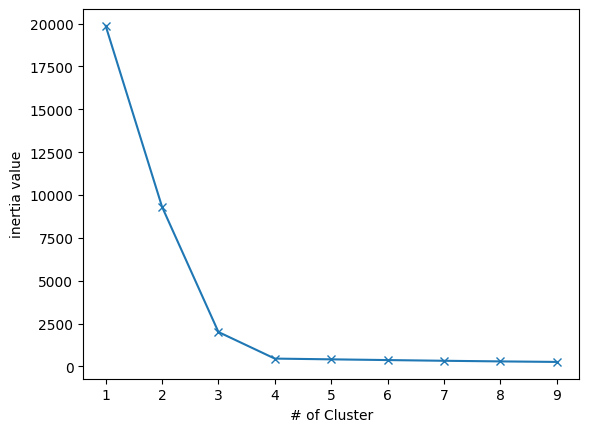

In [ ]:
inertia_list = []
for i in range(1, 10):
  km_model = KMeans(n_clusters=i,n_init=10, random_state=42)
  km_model.fit(X)
  inertia_list.append(km_model.inertia_)

plt.plot(range(1, 10), inertia_list, marker='x')
plt.xlabel('# of Cluster')
plt.ylabel('inertia value')